In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sleep = pd.read_csv('Sleep.csv')
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
sleep[['Systolic','Diastolic']] = sleep['Blood Pressure'].str.split('/',expand=True)
sleep['Systolic'] = sleep['Systolic'].astype(int)
sleep['Diastolic'] = sleep['Diastolic'].astype(int)
sleep = sleep.drop(columns=['Blood Pressure','Person ID'])
sleep

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [5]:
sleep

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


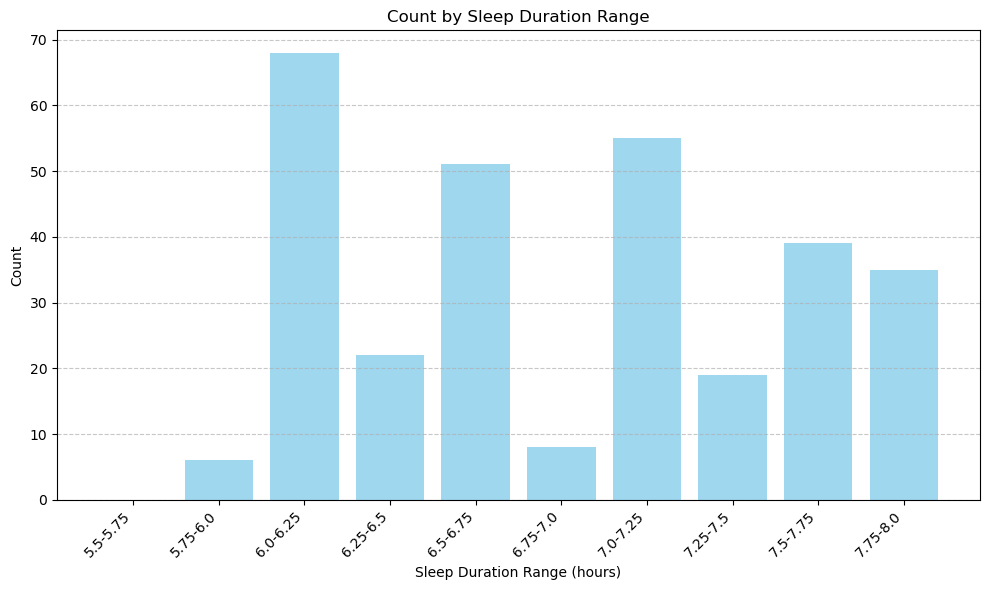

In [6]:
bins = np.arange(5.5, 8.25, 0.25)  # 5.5到8，每0.25一个区间
labels = [f"{round(b, 2)}-{round(b + 0.25, 2)}" for b in bins[:-1]]  # 区间标签


# 按区间统计组数
duration_counts = pd.cut(sleep['Sleep Duration'], bins=bins, labels=labels, right=False).value_counts(sort=False)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.bar(duration_counts.index.astype(str), duration_counts.values, color='skyblue', alpha=0.8)
plt.xlabel('Sleep Duration Range (hours)')
plt.ylabel('Count')
plt.title('Count by Sleep Duration Range')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
occupation_stats = sleep.groupby('Occupation')['Sleep Duration'].agg(['mean', 'count']).reset_index()
occupation_stats.rename(columns={'mean': 'Mean Sleep Duration', 'count': 'Sample Size'}, inplace=True)

print(occupation_stats)

              Occupation  Mean Sleep Duration  Sample Size
0             Accountant             7.113514           37
1                 Doctor             6.970423           71
2               Engineer             7.987302           63
3                 Lawyer             7.410638           47
4                Manager             6.900000            1
5                  Nurse             7.063014           73
6   Sales Representative             5.900000            2
7            Salesperson             6.403125           32
8              Scientist             6.000000            4
9      Software Engineer             6.750000            4
10               Teacher             6.690000           40


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
discrete_cols = ['Gender','BMI Category','Occupation']
encoded_data = encoder.fit_transform(sleep[discrete_cols])
column_name = encoder.get_feature_names_out(discrete_cols)
encoded_sleep = pd.DataFrame(encoded_data, columns=column_name, index=sleep.index)
X = pd.concat([sleep.drop(columns=discrete_cols), encoded_sleep], axis=1)
X = X.drop(columns=['Gender_Female','BMI Category_Normal','Occupation_Accountant'])
X

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,27,6.1,6,42,6,77,4200,NaN,126,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28,6.2,6,60,8,75,10000,NaN,125,80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,6.2,6,60,8,75,10000,NaN,125,80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,5.9,4,30,8,85,3000,Sleep Apnea,140,90,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,5.9,4,30,8,85,3000,Sleep Apnea,140,90,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,Sleep Apnea,140,95,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
370,59,8.0,9,75,3,68,7000,Sleep Apnea,140,95,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
371,59,8.1,9,75,3,68,7000,Sleep Apnea,140,95,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372,59,8.1,9,75,3,68,7000,Sleep Apnea,140,95,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'Gender_Male', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher'],
      dtype='object')

In [20]:
import arviz as az
ess_arviz = az.ess(np.array(X.drop(columns=['Sleep Disorder'])))
print(f"ArviZ 计算的 ESS: {ess_arviz}")

ArviZ 计算的 ESS: 1043.9684372123954


In [10]:
# 提取目标变量和特征
y = X["Sleep Duration"].values
X_fixed = X[["Age", "Gender_Male",'Physical Activity Level','Stress Level','Heart Rate','Daily Steps','Systolic','Diastolic']].values
X_random = pd.get_dummies(X[['BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher']], drop_first=True).values

# 设置模型参数
n_samples = 5000  # 采样步数
num_random_effects = X_random.shape[1]
num_fixed_effects = X_fixed.shape[1]

In [22]:
y = X["Sleep Duration"].values
X_fixed = X[["Age", "Gender_Male", "Physical Activity Level", "Stress Level",
             "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]].values
X_random = pd.get_dummies(X[['BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight',
                             'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
                             'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative',
                             'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer',
                             'Occupation_Teacher']], drop_first=True).values

n_samples = 5000
num_fixed_effects = X_fixed.shape[1]
num_random_effects = X_random.shape[1]

# 先验分布参数
sigma_beta = 10
sigma_u = 5
sigma_eps = 2
sigma_u_prior = 2  # 随机效应的方差先验

# 初始化
beta = np.zeros(num_fixed_effects)
u = np.zeros(num_random_effects)
sigma_eps = 1
sigma_u2 = 1  # 随机效应方差的初始值

# 保存采样结果
samples_beta = np.zeros((n_samples, num_fixed_effects))
samples_u = np.zeros((n_samples, num_random_effects))
samples_sigma_eps = np.zeros(n_samples)
samples_sigma_u2 = np.zeros(n_samples)

for t in range(n_samples):
    # 1. 更新 beta (Gibbs)
    XtX = X_fixed.T @ X_fixed + np.eye(num_fixed_effects) / sigma_beta**2
    XtY = X_fixed.T @ (y - X_random @ u)
    beta_cov = np.linalg.inv(XtX)
    beta_mean = beta_cov @ XtY
    beta = np.random.multivariate_normal(beta_mean, sigma_eps**2 * beta_cov)

    # 2. 更新 u (Gibbs)
    ZtZ = X_random.T @ X_random + np.eye(num_random_effects) / sigma_u2
    ZtY = X_random.T @ (y - X_fixed @ beta)
    u_cov = np.linalg.inv(ZtZ)
    u_mean = u_cov @ ZtY
    u = np.random.multivariate_normal(u_mean, sigma_eps**2 * u_cov)

    # 3. 更新 sigma_eps (Gibbs)
    residuals = y - X_fixed @ beta - X_random @ u
    a_eps = 1 + len(y) / 2
    b_eps = 1 + np.sum(residuals**2) / 2
    sigma_eps = 1 / np.random.gamma(a_eps, 1 / b_eps)

    # 4. 更新 sigma_u2 (Metropolis)
    # 提议分布 q(sigma_u2' | sigma_u2) 为对称分布，例如正态分布
    sigma_u2_proposed = np.abs(np.random.normal(sigma_u2, 0.5))  # 提议新值
    log_prior_current = -0.5 * sigma_u_prior**2 * sigma_u2
    log_prior_proposed = -0.5 * sigma_u_prior**2 * sigma_u2_proposed

    log_likelihood_current = -0.5 * np.sum(u**2) / sigma_u2
    log_likelihood_proposed = -0.5 * np.sum(u**2) / sigma_u2_proposed

    log_acceptance_ratio = (log_prior_proposed + log_likelihood_proposed) - \
                           (log_prior_current + log_likelihood_current)
    if np.log(np.random.rand()) < log_acceptance_ratio:
        sigma_u2 = sigma_u2_proposed  # 接受提议值

    # 保存采样结果
    samples_beta[t] = beta
    samples_u[t] = u
    samples_sigma_eps[t] = sigma_eps
    samples_sigma_u2[t] = sigma_u2

print("Gibbs和Metropolis混合采样完成！")


Gibbs和Metropolis混合采样完成！


In [23]:
beta_mean = samples_beta.mean(axis=0)
beta_std = samples_beta.std(axis=0)
print("Fixed Effects Means:", beta_mean)
print("Fixed Effects Standard Deviations:", beta_std)

Fixed Effects Means: [ 4.04822071e-02  1.98118414e-01  1.67920508e-03 -4.56282937e-01
  1.00559767e-01  7.22859334e-06 -6.28433926e-02  1.04531186e-01]
Fixed Effects Standard Deviations: [1.93198583e-03 3.43336785e-02 8.67365490e-04 8.84656139e-03
 2.88142935e-03 1.69226605e-05 9.31279073e-03 1.34634249e-02]


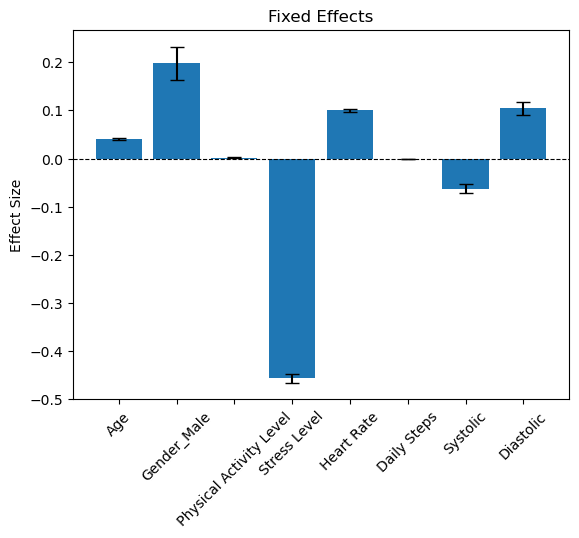

In [24]:
variable_names = ["Age", "Gender_Male", "Physical Activity Level", "Stress Level",
                  "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]

means = np.array(beta_mean)
stds = np.array(beta_std)

plt.bar(variable_names, means, yerr=stds, capsize=5)
plt.xticks(rotation=45)
plt.ylabel("Effect Size")
plt.title("Fixed Effects")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.show()

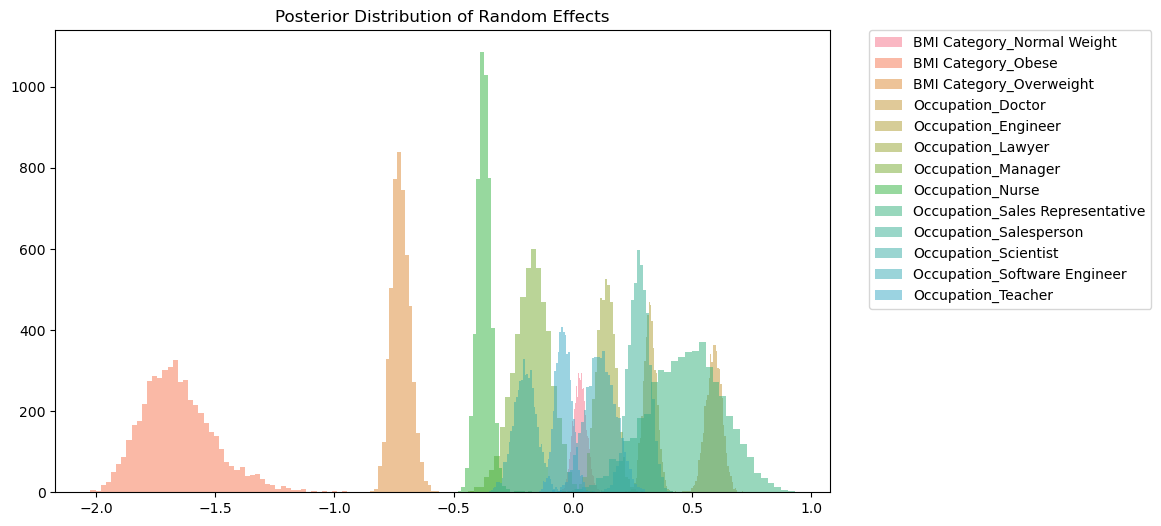

In [25]:
import seaborn as sns
random_cols = ['BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight',
                             'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
                             'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative',
                             'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer',
                             'Occupation_Teacher']
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 20)  
for i in range(samples_u.shape[1]):
    plt.hist(samples_u[:, i], bins=50, alpha=0.5, label=random_cols[i],color=palette[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Posterior Distribution of Random Effects")
plt.show()

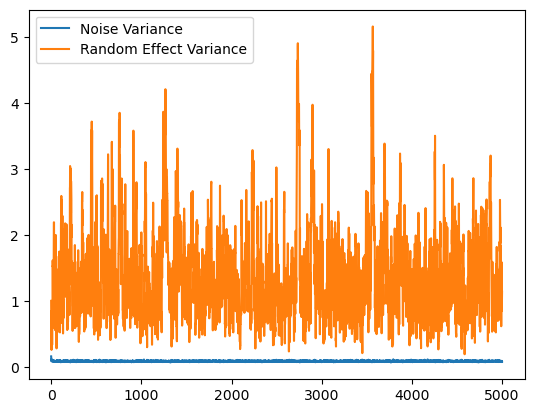

In [152]:
plt.plot(samples_sigma_eps, label="Noise Variance")
plt.plot(samples_sigma_u2, label="Random Effect Variance")
plt.legend()
plt.show()